# Group 30: Phase 0 - Cats vs Dogs Detector (CaDoD)

## Team Neuro Members:
* Bhargav Sai Gogineni

  email : bgoginen@iu.edu

* Harini Mohanasundaram

  email : harmohan@iu.edu

* Tarika Sadey

  email : tsadey@iu.edu

* Suraj Gupta Gudla

  email : surgudla@iu.edu
  
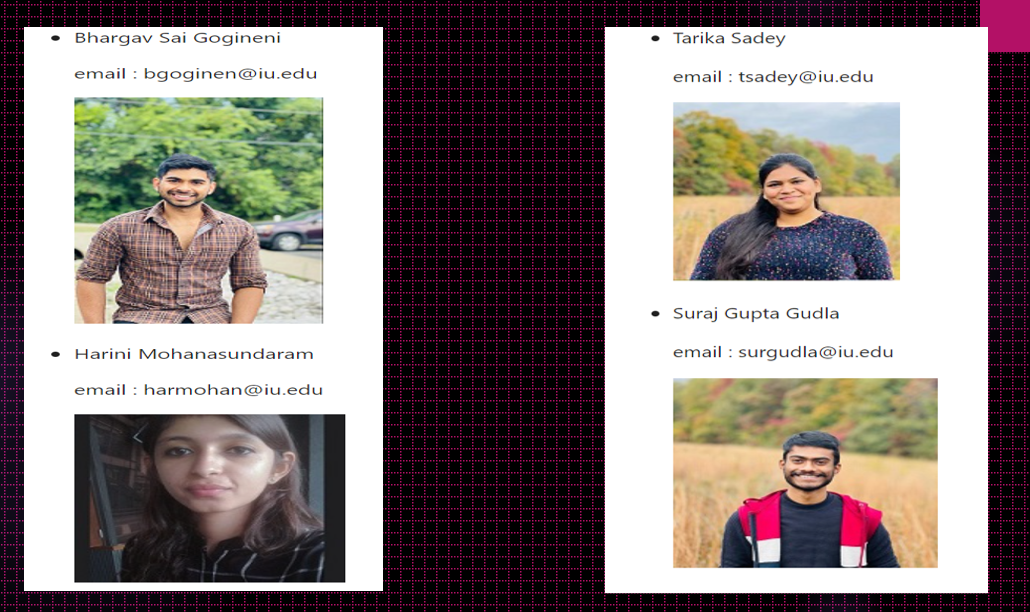

# Project Abstract

One of the biggest challenges in the field of computer vision is Image Classification and detection which has varied applications starting from the field of medicine, space object detection and so on. The aim of this project is to perform image classification analysis on a dataset to differentiate between cat and dog images using classification and regression models. We first preprocess the images from the image catalogue using different function metrics and using the RGB intensity value arrays we feed them into classifiers to predict labels(cat/dog) and bounding boxes for which we will implement baseline model Logistic Regression as our classifier and optimize using stochastic gradient descent at an adaptive learning rate, homegrown logistic regression and linear regression to predict class, bounding boxes and loss function attributes using both sklearn and pytorch. We then plan to extend our model training by implementing Convolutional Neural Network(CNN) model for single object detection using Pytorch and use different performance metrics such as RMSE, MSE and accuracy to measure our model performance.

## Project Description:

Our aim for this project is to build object detection pipelines using Python, OpenCV, SKLearn, and  PyTorch to detect cat and dog images.We import the image catalogue data, perform Exploratory data analysis on it, derrive some metrics and baseline models on the data.In order to create a detector, we will first have to preprocess the images to be all of the same shapes, take their RGB intensity values and flatten them from a 3D array to 2D. Then we will feed this array into a linear classifier and a linear regressor to predict labels and bounding boxes.

Build an SKLearn model for image classification and another model for regression
Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE
Build a baseline pipeline in PyTorch to object classification and object localization

Build a convolutional neural network network for single object classifier and detector.


# Data Description:
The data set consists of about 12,966 RGB images of cats and dogs with varying shapes and aspect ratios. The image bounding box coordinates are stored in a .csv file which contain image description, box coordinate descriptions along with some required attributes. We define some of the data attributes as below:

* ImageID :-  the image id the box lives in	
* LabelName: this defines the class(cat/dog) of the image
* XMin, XMax, YMin, YMax: coordinates of the box, in normalized image coordinates.
* Source: indicates how the box was made: (xclick/activemil) where manually drawn boxes are generated from xclick and boxes produced from an human enhanced version method are represented as activemil.
* Confidence: a resource dummy value always equal to 1
* IsOccluded: (0 or 1) describes whether an object is being obstructed by another object in the image.
* IsTruncated: Indicates that the object extends beyond the boundary of the image.
* IsGroupOf: Indicates that the box spans a group of objects (e.g., a bed of flowers or a crowd of people). We     asked annotators to use this tag for cases with more than 5 instances which are heavily occluding each other and are physically touching.
* IsDepiction: (0 or 1) indicates whether an object in the image is real or a depicted picture
* IsInside: Indicates a picture taken from the inside of the object (e.g., a car interior or inside of a building). For each of them, value 1 indicates present, 0 not present, and -1 unknown.	
* XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y: normalized image coordinates of the four extreme points of the object that produced the box.

In [2]:
from collections import Counter
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
import tarfile
from tqdm.notebook import tqdm
import warnings

# Import Data

### Unarchive data

In [3]:
def extract_tar(file, path):
    """
    function to extract tar.gz files to specified location
    
    Args:
        file (str): path where the file is located
        path (str): path where you want to extract
    """
    with tarfile.open(file) as tar:
        files_extracted = 0
        for member in tqdm(tar.getmembers()):
            if os.path.isfile(path + member.name[1:]):
                continue
            else:
                tar.extract(member, path)
                files_extracted += 1
        tar.close()
        if files_extracted < 3:
            print('Files already exist')

In [4]:
path = 'images/'

extract_tar('/content/drive/MyDrive/AML_Project/cadod.tar.gz', path)

  0%|          | 0/25936 [00:00<?, ?it/s]

### Load bounding box meta data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/AML_Project/cadod.csv')

In [6]:
df.head()

ImageID  Source  LabelName  ...  XClick2Y  XClick3Y  XClick4Y
0  0000b9fcba019d36  xclick  /m/0bt9lr  ...  0.506667  0.998333  0.661667
1  0000cb13febe0138  xclick  /m/0bt9lr  ...  0.410882  0.999062  0.999062
2  0005a9520eb22c19  xclick  /m/0bt9lr  ...  0.226296  0.998736  0.305942
3  0006303f02219b07  xclick  /m/0bt9lr  ...  0.375294  0.720000  0.998824
4  00064d23bf997652  xclick  /m/0bt9lr  ...  0.370000  0.424286  0.694286

[5 rows x 21 columns]

In [7]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

# Exploratory Data Analysis

## Statistics

In [8]:
print(f"There are a total of {len(glob.glob1(path, '*.jpg'))} images")

There are a total of 12966 images


In [9]:
print(f"The total size is {os.path.getsize(path)/1000} MB")

The total size is 1110.016 MB


In [10]:
df.shape

(12966, 21)

Replace `LabelName` with human readable labels

In [11]:
df.LabelName.replace({'/m/01yrx':'cat', '/m/0bt9lr':'dog'}, inplace=True)

In [12]:
df.LabelName.value_counts()

dog    6855
cat    6111
Name: LabelName, dtype: int64

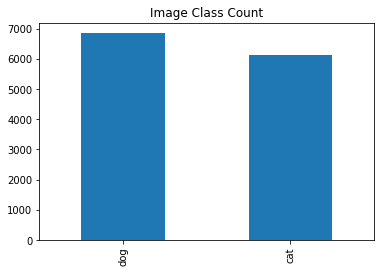

In [13]:
df.LabelName.value_counts().plot(kind='bar')
plt.title('Image Class Count')
plt.show()

In [14]:
df.describe()

Confidence          XMin  ...      XClick3Y      XClick4Y
count     12966.0  12966.000000  ...  12966.000000  12966.000000
mean          1.0      0.099437  ...      0.641749      0.582910
std           0.0      0.113023  ...      0.448054      0.403454
min           1.0      0.000000  ...     -1.000000     -1.000000
25%           1.0      0.000000  ...      0.405817      0.400000
50%           1.0      0.061250  ...      0.825000      0.646667
75%           1.0      0.167500  ...      0.998042      0.882500
max           1.0      0.592500  ...      1.000000      0.999375

[8 rows x 18 columns]

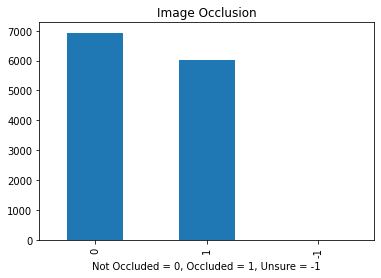

Counter({0: 6934, 1: 6029, -1: 3})


In [15]:
df.IsOccluded.value_counts().plot(kind='bar')
plt.title('Image Occlusion')
plt.xlabel("Not Occluded = 0, Occluded = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsOccluded'])
print(count_unique)

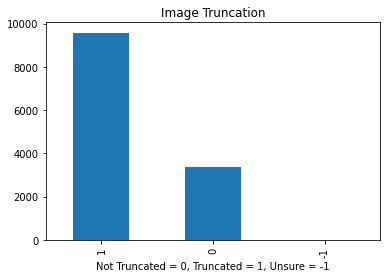

Counter({1: 9578, 0: 3385, -1: 3})


In [16]:
df.IsTruncated.value_counts().plot(kind='bar')
plt.title('Image Truncation')
plt.xlabel("Not Truncated = 0, Truncated = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsTruncated'])
print(count_unique)

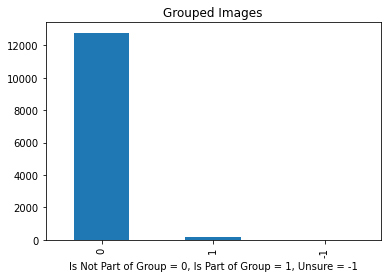

Counter({0: 12783, 1: 180, -1: 3})


In [17]:
df.IsGroupOf.value_counts().plot(kind='bar')
plt.title('Grouped Images')
plt.xlabel("Is Not Part of Group = 0, Is Part of Group = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsGroupOf'])
print(count_unique)

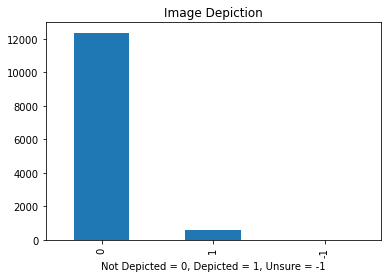

Counter({0: 12371, 1: 592, -1: 3})


In [18]:
df.IsDepiction.value_counts().plot(kind='bar')
plt.title('Image Depiction')
plt.xlabel("Not Depicted = 0, Depicted = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsDepiction'])
print(count_unique)

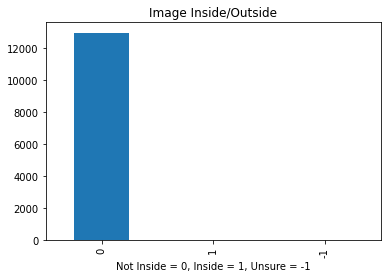

Counter({0: 12945, 1: 18, -1: 3})


In [19]:
df.IsInside.value_counts().plot(kind='bar')
plt.title('Image Inside/Outside')
plt.xlabel("Not Inside = 0, Inside = 1, Unsure = -1")
plt.show()

count_unique = Counter(df['IsInside'])
print(count_unique)

## Sample of Images

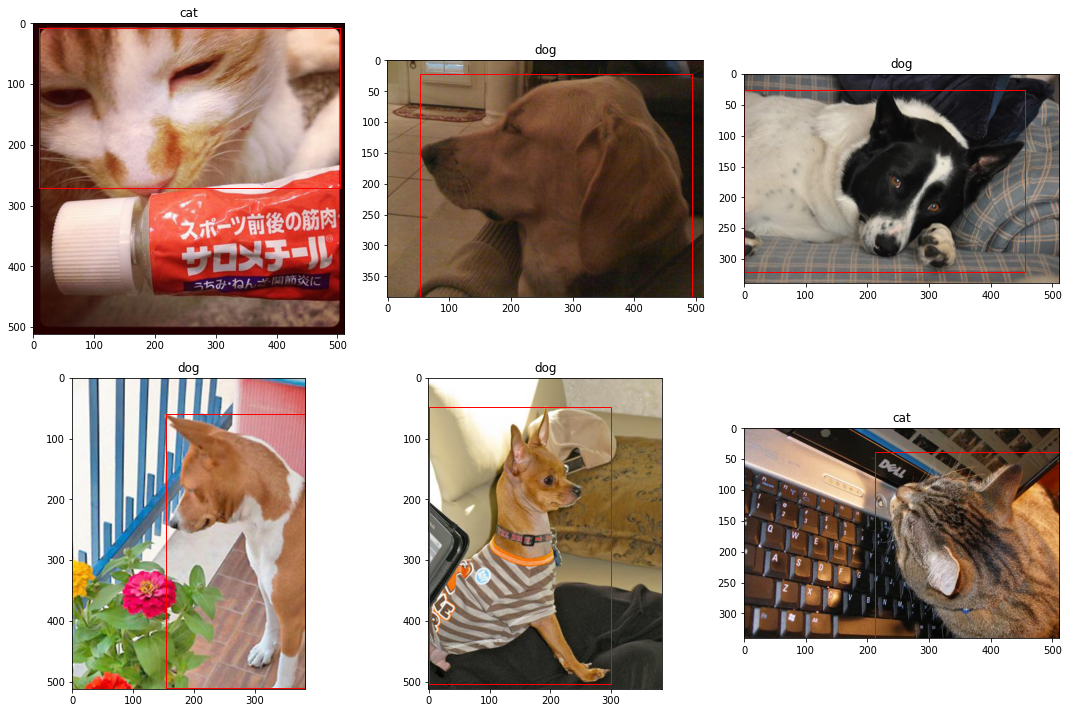

In [20]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Image shapes and sizes

Go through all images and record the shape of the image in pixels and the memory size

In [21]:
img_shape = []
img_size = np.zeros((df.shape[0], 1))

for i,f in enumerate(tqdm(glob.glob1(path, '*.jpg'))):
    file = path+'/'+f
    img = Image.open(file)
    img_shape.append(f"{img.size[0]}x{img.size[1]}")
    img_size[i] += os.path.getsize(file)

  0%|          | 0/12966 [00:00<?, ?it/s]

Count all the different image shapes

In [22]:
img_shape_count = Counter(img_shape)

In [23]:
# create a dataframe for image shapes
img_df = pd.DataFrame(set(img_shape_count.items()), columns=['img_shape','img_count'])

In [24]:
img_df.shape

(594, 2)

In [25]:
img_df.head(5)

img_shape  img_count
0   512x321          5
1   485x512          4
2   512x452          2
3   512x263          1
4   392x512          1

There are a ton of different image shapes. Let's narrow this down by getting a sum of any image shape that has a cout less than 100 and put that in a category called `other`

In [26]:
img_df = img_df.append({'img_shape': 'other','img_count': img_df[img_df.img_count < 100].img_count.sum()}, 
                       ignore_index=True)

Drop all image shapes

In [27]:
img_df = img_df[img_df.img_count >= 100]

Check if the count sum matches the number of images

In [28]:
img_df.img_count.sum() == df.shape[0]

True

Plot

## TODO plot aspect ratio

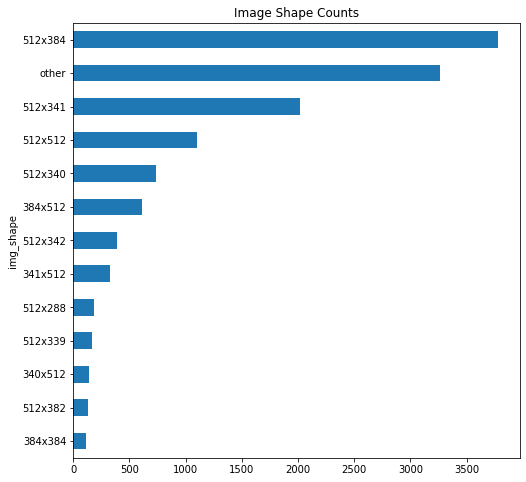

In [29]:
img_df.sort_values('img_count', inplace=True)
img_df.plot(x='img_shape', y='img_count', kind='barh', figsize=(8,8), legend=False)
plt.title('Image Shape Counts')
plt.show()

In [30]:
# convert to megabytes
img_size = img_size / 1000

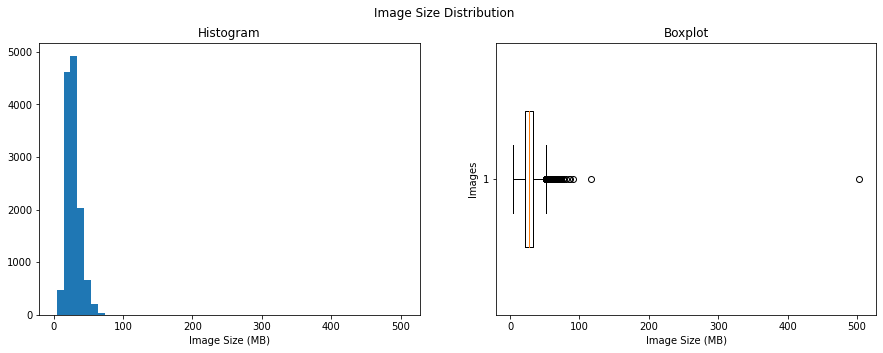

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Image Size Distribution')
ax[0].hist(img_size, bins=50)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Image Size (MB)')
ax[1].boxplot(img_size, vert=False, widths=0.5)
ax[1].set_title('Boxplot')
ax[1].set_xlabel('Image Size (MB)')
ax[1].set_ylabel('Images')
plt.show()

# Preprocess

## Rescale the images

In [32]:
!mkdir -p images/resized

In [33]:
%%time
# resize image and save, convert to numpy

img_arr = np.zeros((df.shape[0],32*32*3)) # initialize np.array

for i, f in enumerate(tqdm(df.ImageID)):
    img = Image.open(path+f+'.jpg')
    img_resized = img.resize((32,32))
    img_resized.save("images/resized/"+f+'.jpg', "JPEG", optimize=True)
    img_arr[i] = np.asarray(img_resized, dtype=np.uint8).flatten()

  0%|          | 0/12966 [00:00<?, ?it/s]

CPU times: user 1min 8s, sys: 3.23 s, total: 1min 11s
Wall time: 1min 11s


In [34]:
df["ImageArray"]=[img for img in img_arr]


In [35]:
df.head()

ImageID  ...                                         ImageArray
0  0000b9fcba019d36  ...  [59.0, 128.0, 182.0, 68.0, 131.0, 184.0, 68.0,...
1  0000cb13febe0138  ...  [89.0, 89.0, 87.0, 93.0, 93.0, 91.0, 140.0, 13...
2  0005a9520eb22c19  ...  [94.0, 100.0, 90.0, 90.0, 96.0, 86.0, 80.0, 85...
3  0006303f02219b07  ...  [132.0, 101.0, 80.0, 149.0, 118.0, 95.0, 161.0...
4  00064d23bf997652  ...  [1.0, 44.0, 8.0, 0.0, 43.0, 8.0, 1.0, 46.0, 11...

[5 rows x 22 columns]

In [36]:
img_arr[0]


array([ 59., 128., 182., ...,  59., 141., 203.])

## Resized and Filtered Images
Plot the resized and filtered images

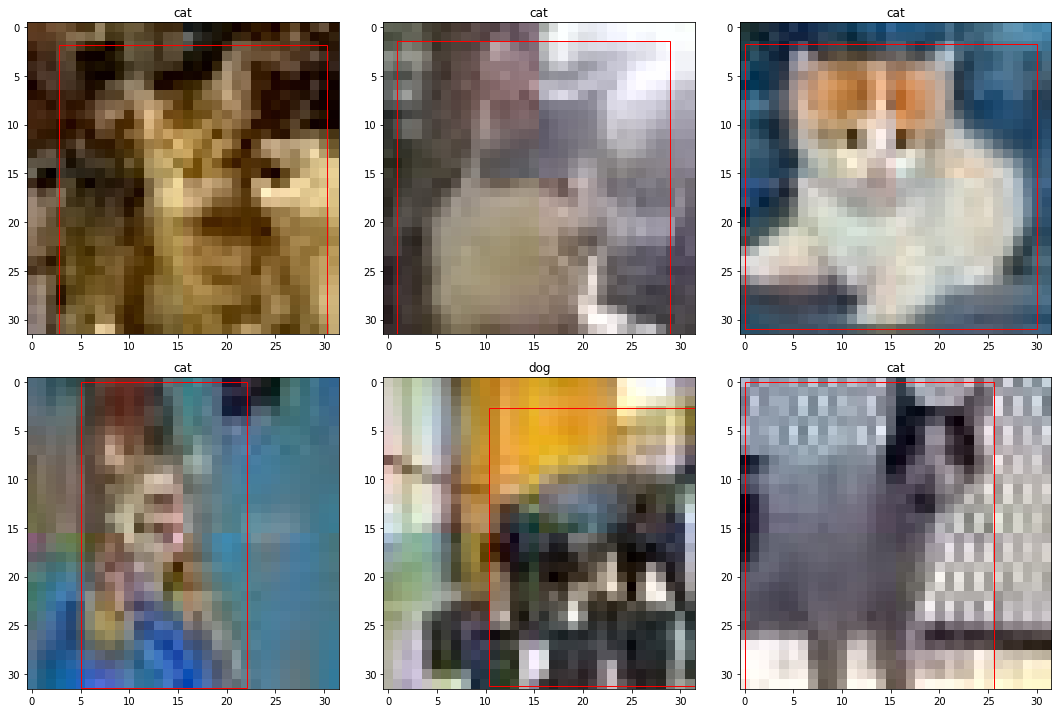

In [37]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(df.shape[0], size=6, replace=False)):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

In [38]:
# encode labels
df['Label'] = (df.LabelName == 'dog').astype(np.uint8)

#### Comparing Images Before an After Resize

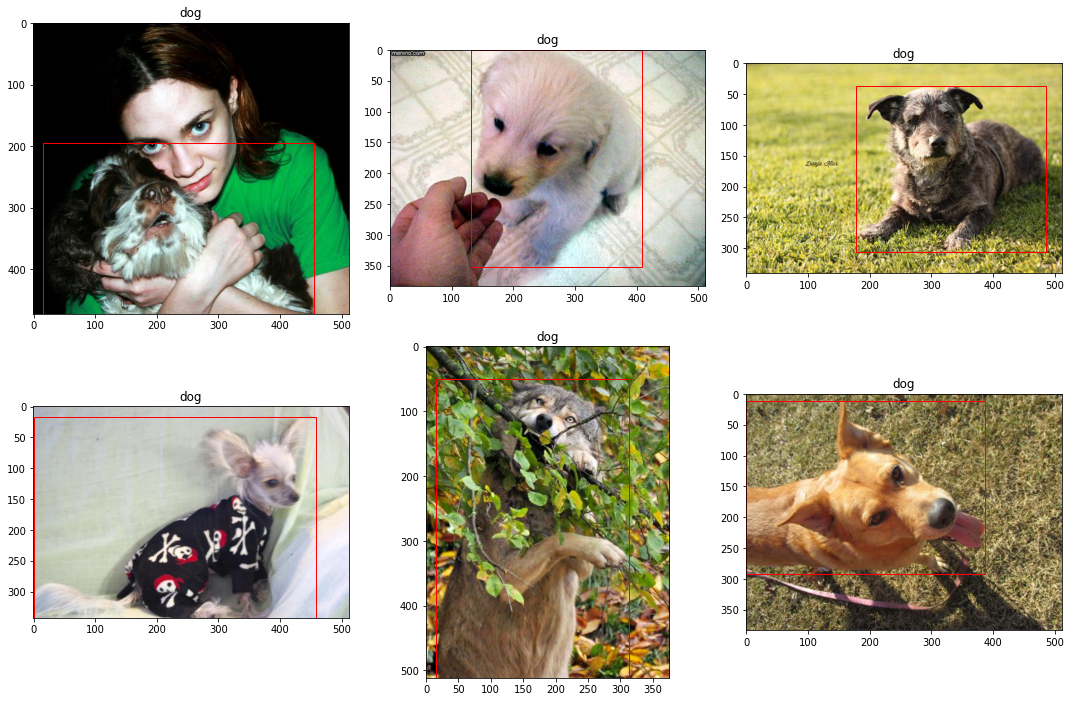

In [39]:
# plot first 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(df.index[5584:5590].to_numpy()):
    img = mpimg.imread(path + df.ImageID.values[j] + '.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.LabelName[j])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

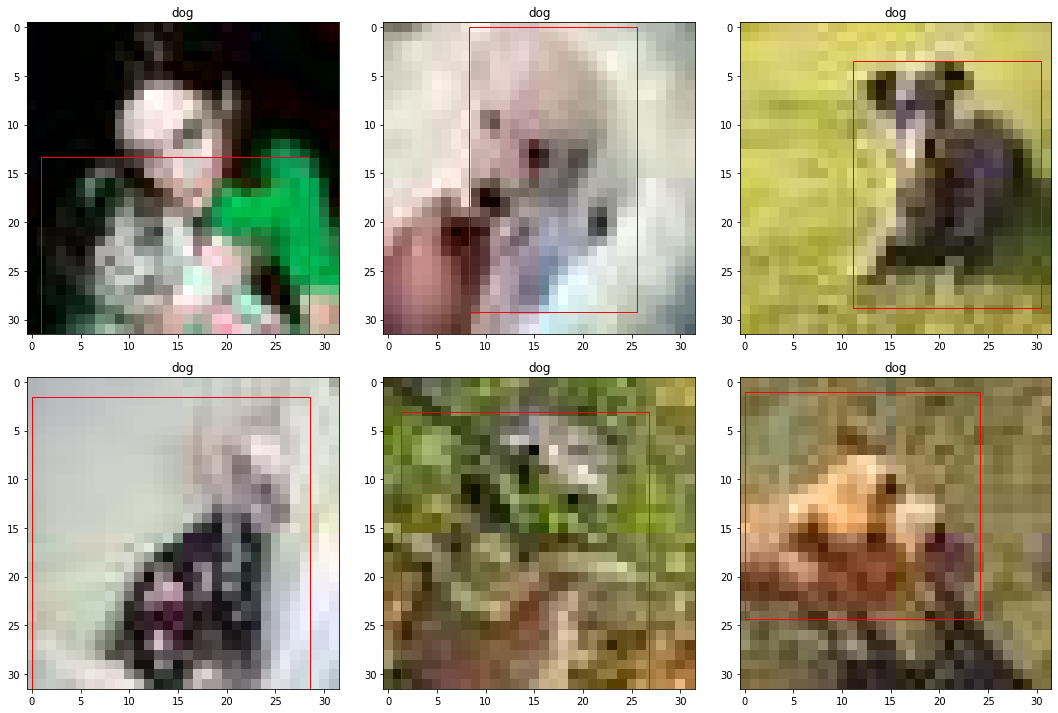

In [40]:
# plot the same 6 images shown above after transforamtion
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(df.index[5584:5590].to_numpy()):
    img = mpimg.imread(path+'/resized/'+df.ImageID.values[j]+'.jpg')
    h, w = img.shape[:2]
    coords = df.iloc[j,4:8]
    ax[i].imshow(img)
    ax[i].set_title(df.iloc[j,2])
    ax[i].add_patch(plt.Rectangle((coords[0]*w, coords[2]*h), 
                                  coords[1]*w-coords[0]*w, coords[3]*h-coords[2]*h, 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

## Checkpoint and Save data

In [41]:
mkdir -p data

In [42]:
np.save('data/img.npy', img_arr.astype(np.uint8))
np.save('data/y_label.npy', df.Label.values)
np.save('data/y_bbox.npy', df[['XMin', 'YMin', 'XMax', 'YMax']].values.astype(np.float32))

# Baseline in SKLearn

## Load data

In [43]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

In [44]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'ImageArray', 'Label'],
      dtype='object')

In [45]:
idx_to_label = {1:'dog', 0:'cat'} # encoder

Double check that it loaded correctly

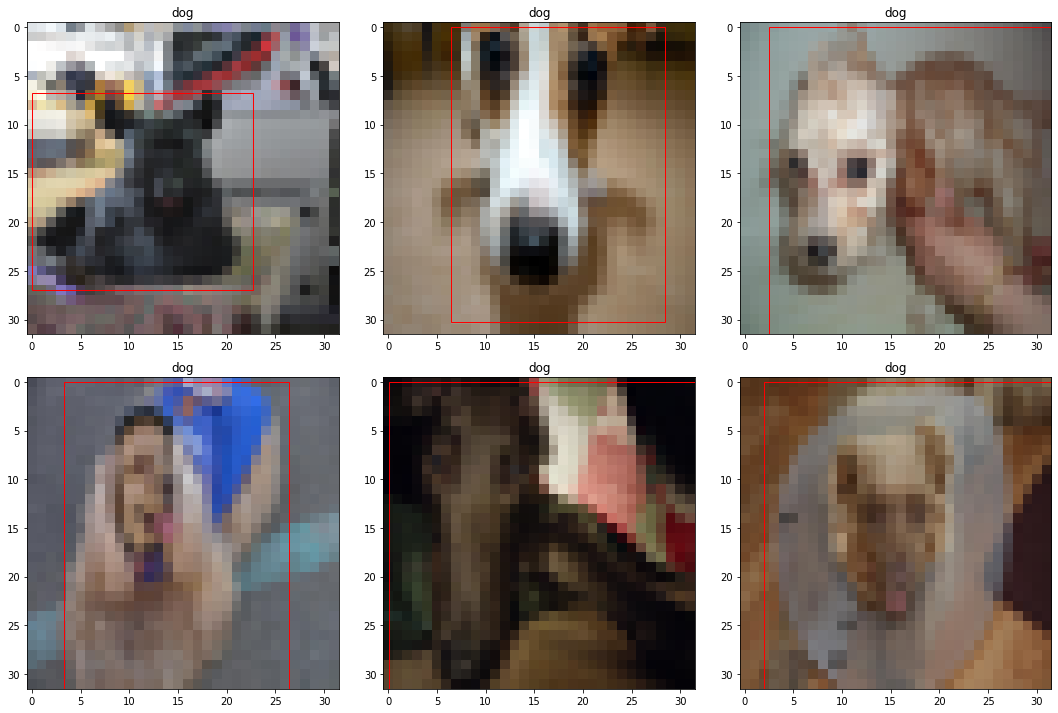

In [46]:
# plot random 6 images
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False,figsize=(15,10))
ax = ax.flatten()

for i,j in enumerate(np.random.choice(X.shape[0], size=6, replace=False)):
    coords = y_bbox[j] * 32
    ax[i].imshow(X[j].reshape(32,32,3))
    ax[i].set_title(idx_to_label[y_label[j]])
    ax[i].add_patch(plt.Rectangle((coords[0], coords[1]), 
                                  coords[2]-coords[0], coords[3]-coords[1], 
                                  edgecolor='red', facecolor='none'))

plt.tight_layout()
plt.show()

# Classification

### Split data

Create training and testing sets

In [47]:
X_train, X_test, y_train, y_test_label = train_test_split(X, y_label, test_size=0.01, random_state=27)

### Train

I'm choosing `SGDClassifier` because the data is large and I want to be able to perform stochastic gradient descent and also its ability to early stop. With this many parameters, a model can easily overfit so it's important to try and find the point of where it begins to overfit and stop for optimal results.

In [48]:
%%time
model = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10, 
                      early_stopping=True, validation_fraction=0.1, n_iter_no_change=3)
# 0.2 validation TODO
model.fit(X_train, y_train)

CPU times: user 1.11 s, sys: 533 ms, total: 1.64 s
Wall time: 1.2 s


In [49]:
model.n_iter_

4

Did it stop too early? Let's retrain with a few more iterations to see. Note that `SGDClassifier` has a parameter called `validation_fraction` which splits a validation set from the training data to determine when it stops.

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

In [53]:
model2 = SGDClassifier(loss='log', n_jobs=-1, random_state=27, learning_rate='adaptive', eta0=1e-10)

epochs = 30

train_acc = np.zeros(epochs)
valid_acc = np.zeros(epochs)
for i in tqdm(range(epochs)):
    model2.partial_fit(X_train, y_train, np.unique(y_train))
    
    #log
    train_acc[i] += np.round(accuracy_score(y_train, model2.predict(X_train)),3)
    valid_acc[i] += np.round(accuracy_score(y_valid, model2.predict(X_valid)),3)

  0%|          | 0/30 [00:00<?, ?it/s]

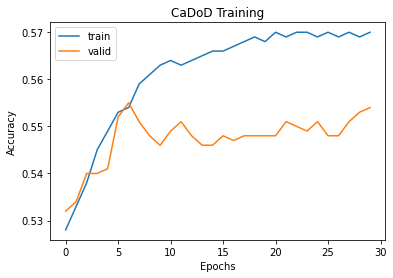

In [54]:
plt.plot(train_acc, label='train')
plt.plot(valid_acc, label='valid')
plt.title('CaDoD Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
del model2

### Evaluation

In [56]:
expLog = pd.DataFrame(columns=["exp_name", 
                               "Train Acc", 
                               "Valid Acc",
                               "Test  Acc",
                               "Train MSE", 
                               "Valid MSE",
                               "Test  MSE",
                              ])

In [57]:
exp_name = f"Baseline: Linear Model"
expLog.loc[0,:4] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test_label, model.predict(X_test))],3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  """


In [58]:
expLog

exp_name Train Acc Valid Acc  ... Train MSE Valid MSE Test  MSE
0  Baseline: Linear Model     0.565     0.557  ...       NaN       NaN       NaN

[1 rows x 7 columns]

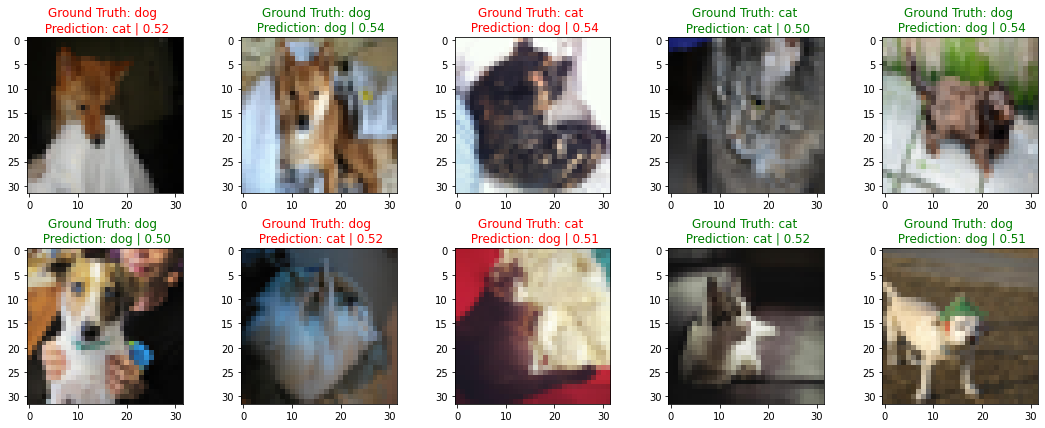

In [59]:
y_pred_label = model.predict(X_test)
y_pred_label_proba = model.predict_proba(X_test)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False,figsize=(15,6))
ax = ax.flatten()

for i in range(10):
    img = X_test[i].reshape(32,32,3)
    ax[i].imshow(img)
    ax[i].set_title("Ground Truth: {0} \n Prediction: {1} | {2:.2f}".format(idx_to_label[y_test_label[i]],
                                                                   idx_to_label[y_pred_label[i]],
                                                                   y_pred_label_proba[i][y_pred_label[i]]),
                   color=("green" if y_pred_label[i]==y_test_label[i] else "red"))

plt.tight_layout()
plt.show()

Import Required Libraries


In [60]:
# imports
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
from time import time
from scipy import stats
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [62]:
# Imports for metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit
# Imports for stats
from scipy import stats
                       
# Convert a number to a percent.    
def pct(x):
    return round(100*x,1)

# Set up reporting
import pandas as pd
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Set up ShuffleSplit for p_value testing
cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)

In [63]:
def ttest(control, treatment):
    #paired t-test; two-tailed p-value      A   ,    B
    (t_score, p_value) = stats.ttest_rel(control, treatment)

    if p_value > 0.05/2:  #Two sided 
        print('There is no significant difference between the two machine learning pipelines (Accept H0)')
    else:
        print('The two machine learning pipelines are different (reject H0) \n(t_score, p_value) = (%.2f, %.5f)'%(t_score, p_value) )
        if t_score > 0.0: #in the case of regression lower RMSE is better; A is lower 
            print('Machine learning pipeline A is better than B')
        else:
            print('Machine learning pipeline B is better than A')
    return p_value

In [64]:
data = df
y_data = data['Label']
x_data = data.drop(['Label', 'XClick1X', 'XClick2X','XClick3X','XClick4X','XClick1Y', 'XClick2Y','XClick3Y','XClick4Y','Source'], axis = 1)

In [65]:
corr_matrix = data.corr()
corr_matrix["Label"].sort_values(ascending=False)

Label          1.000000
IsOccluded     0.397112
XClick4X       0.167493
XClick2Y       0.134961
XClick1Y       0.132553
XClick4Y       0.109203
XMin           0.103046
YMin           0.083317
XClick3X       0.077203
XClick1X       0.072189
XClick2X       0.041927
XClick3Y       0.035337
YMax           0.029408
IsTruncated    0.020644
IsDepiction    0.018157
IsGroupOf      0.003171
IsInside      -0.030458
XMax          -0.085277
Confidence          NaN
Name: Label, dtype: float64

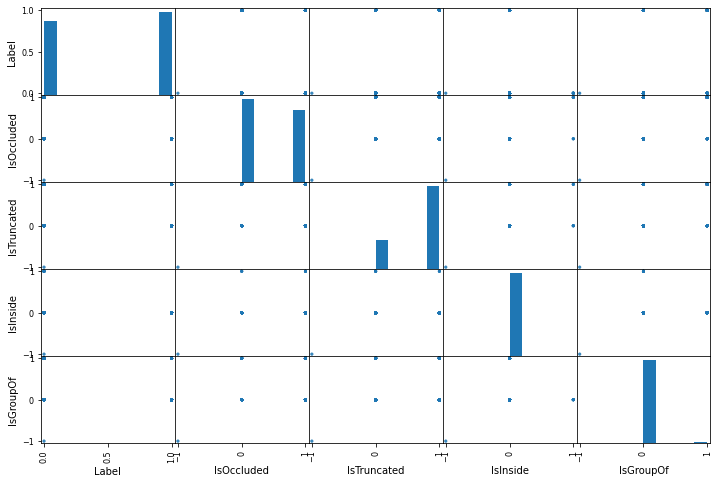

In [66]:
# Correlation observation

from pandas.plotting import scatter_matrix

# Top four correlated inputs with survived
attributes = ["Label", "IsOccluded", "IsTruncated", "IsInside", "IsGroupOf"]
scatter_matrix(data[attributes], figsize=(12, 8));

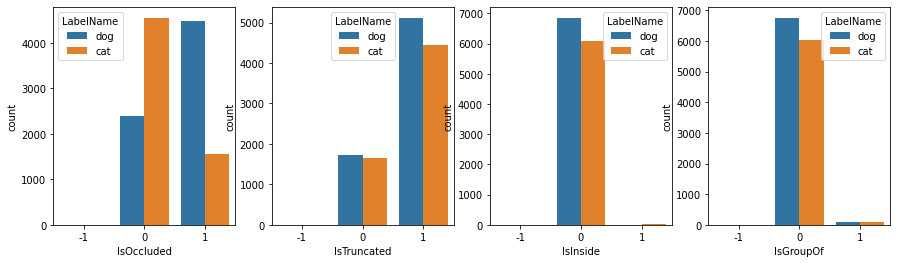

In [67]:
cat_vars = ['IsOccluded', 'IsTruncated', 'IsInside','IsGroupOf']
plt.figure(figsize=(15,4))
for idx, cat in enumerate(cat_vars):
    plt.subplot(1, 4, idx+1)
    sns.countplot(data[cat], hue=data['LabelName'])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=42)

#### Build Processing Pipelines

In [69]:
from sklearn.pipeline import Pipeline, FeatureUnion

# Identify the numeric features we wish to consider. 
num_attribs = [
    'IsOccluded', 
    'IsTruncated', 
    'IsInside',
    'IsGroupOf'
]
# Create a pipeline for the numeric features.
# Use DataFrameSelector with the numeric features defined above
# Use StandardScaler() to standardize the data
# Missing values will be imputed using the feature median.
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', SimpleImputer(strategy="median")),
                         ('standard_scaler', StandardScaler()),])            

# Identify the categorical features we wish to consider.
cat_attribs = [
    "LabelName"
]
# Identiy the range of expected values for the categorical features.
cat_values = [
    ['Dog','Cat'],     # Embarked
]
# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),]) #TODO <- ColumnTransformer




### Modelling

### Baseline Logistic Regression

In [70]:
X = np.load('data/img.npy', allow_pickle=True)
y_label = np.load('data/y_label.npy', allow_pickle=True)
y_bbox = np.load('data/y_bbox.npy', allow_pickle=True)

# y is y_label
X_train_class, X_test_class, y_train_label, y_test_label = train_test_split(X, y_label, stratify=y_label, shuffle=True, test_size=0.50, random_state=27)

idx_to_label = {1:'dog', 0:'cat'} # encoder

# scale data 
np.random.seed(42)
X = X.astype(np.float32) / 255.
y_label=y_label.astype(int)

X_train_class, X_test_class, y_train_label, y_test_label = train_test_split(X, y_label, stratify=y_label, shuffle=True, test_size=0.20, random_state=27)

X_train_full = X_train_class
y_train_full = y_train_label
X_test_full = X_test_class
y_test_full = y_test_label

X_train, _, y_train, _ = train_test_split(X_train_class, y_train_label, stratify=y_train_label, train_size=0.1, random_state=42)

X_test, _, y_test, _ = train_test_split(X_test_class, y_test_label, stratify=y_test_label, train_size=0.1, random_state=42)


In [71]:
# use full pipeline above to build full pipeline with predictor
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("linear", LogisticRegression(random_state=42))
    ])

start = time()
x_train = X_train
y_train = y_train

full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)

In [72]:
start = time()

x_train = X_train
y_train = y_train


full_pipeline_with_predictor.fit(x_train, y_train)
np.random.seed(42)

# Set up cross validation scores 
# Use ShuffleSplit() with 30 splits, 30% test_size 
# and a random seed of 0
#==================================================#
#               Your code starts here              #
#==================================================#
cv3Splits = ShuffleSplit(n_splits=3, random_state=0, test_size=0.30, train_size=None)
logit_scores = cross_val_score(full_pipeline_with_predictor, x_train, y_train, cv=cv3Splits)             
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

In [73]:
# Time and score test predictions

x_test = X_test
y_test = y_test

start = time()
logit_score_test  = full_pipeline_with_predictor.score(x_test, y_test)
test_time = np.round(time() - start, 4)

In [74]:
results.loc[0] = ["Baseline", pct(logit_score_train), np.round(pct(logit_score_test),3), 
                  "---", train_time, test_time, "Untuned LogisticRegression"]
results

ExpID  ...      Experiment description
0  Baseline  ...  Untuned LogisticRegression

[1 rows x 7 columns]

In [75]:
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('Logistic Regression', LogisticRegression(random_state=42)),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(loss='log',
                                        penalty='l2',
                                        early_stopping=True,
                                        max_iter=10000, tol=1e-5,
                                        random_state=42)),
        ('RandomForest', RandomForestClassifier(random_state=42)),
        ('xgb', xgb.XGBRegressor(validation_fraction=0.2,
                         n_iter_no_change=5, tol=0.01,
                         random_state=0, verbose=1))
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'Logistic Regression': {
            'penalty': ('l1', 'l2'),
            'tol': (0.0001, 0.00001, 0.0000001), 
            'C': (10, 1, 0.1, 0.01),
        },
        'K-Nearest Neighbors': {
            'n_neighbors': (3, 5, 7, 8, 11),
            'p': (1,2),
        },
        'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': (1, 2, 3, 4, 5),
            'C': (10, 1, 0.1, 0.01),
        },
        'Stochastic GD': {
            'tol': (0.0001, 0.0000001), 
            'alpha': (0.1, 0.001, 0.0001), 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22],
            'max_features': [3, 5, 50],
            'min_samples_split': [2, 5, 15],
            'min_samples_leaf': [2, 3, 5],
            'bootstrap': [False],
            'n_estimators':[20, 80, 300]},
        'xgb': {
            'n_estimators':[20,80,300]
        },
 
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
        #("preparation", full_pipeline),
        ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = GridSearchCV(full_pipeline_with_predictor, params, scoring='accuracy', cv=5, 
                                   n_jobs=n_jobs, verbose=verbose)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        #==================================================#
        #               Your code starts here              #
        #==================================================#
        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv3Splits)
        best_train_accuracy = pct(best_train_scores.mean())
        
        #==================================================#
        #               Your code ends here                #
        #               Please don't add code below here   #
        #==================================================#    
       
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]
     

In [78]:
%%time

import xgboost as xgb

# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_train, y_train, X_test, y_test, 0, "Best Model:",  n_jobs=-1,verbose=1)

****** START Best Model: Logistic Regression *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	penalty: ('l1', 'l2')
	tol: (0.0001, 1e-05, 1e-07)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters:
	predictor__C: 0.01
	predictor__penalty: l2
	predictor__tol: 0.0001
****** FINISH Best Model: Logistic Regression  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: (3, 5, 7, 8, 11)
	p: (1, 2)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 2
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: (10, 1, 0.1, 0.01)
	degree: (1, 2, 3, 4, 5)
	kernel: ('rbf', 'poly')
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Para

In [79]:
results

ExpID  ...                             Experiment description
0                        Baseline  ...                         Untuned LogisticRegression
1  Best Model:Logistic Regression  ...  [["predictor__C", 0.01], ["predictor__penalty"...
2  Best Model:K-Nearest Neighbors  ...  [["predictor__n_neighbors", 11], ["predictor__...
3          Best Model:Naive Bayes  ...                                                 []
4       Best Model:Support Vector  ...  [["predictor__C", 1], ["predictor__degree", 1]...
5        Best Model:Stochastic GD  ...  [["predictor__alpha", 0.1], ["predictor__tol",...
6         Best Model:RandomForest  ...  [["predictor__bootstrap", false], ["predictor_...
7                  Best Model:xgb  ...                  [["predictor__n_estimators", 20]]

[8 rows x 7 columns]

# Regression

### Split data

In [80]:
df.columns

Index(['ImageID', 'Source', 'LabelName', 'Confidence', 'XMin', 'XMax', 'YMin',
       'YMax', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y', 'ImageArray', 'Label'],
      dtype='object')

In [81]:
Z=df.copy()
Z.drop(columns=['Label','XMin', 'XMax', 'YMin','YMax','ImageID', 'Source', 'LabelName'],inplace=True)

In [82]:
Z.drop(columns=["ImageArray"],inplace=True)

In [83]:
# np.concatenate([df['ImageArray'].iloc[0],np.array([1,2])])

In [84]:
Z.columns

Index(['Confidence', 'IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction',
       'IsInside', 'XClick1X', 'XClick2X', 'XClick3X', 'XClick4X', 'XClick1Y',
       'XClick2Y', 'XClick3Y', 'XClick4Y'],
      dtype='object')

In [85]:
columns=Z.columns 

final=[]
W=[]
for i in range(0,len(df)):
  arr=[]
  for each in columns:
    arr.append(Z[each].iloc[i])
  # final.append(np.concatenate([df['ImageArray'].iloc[i],np.array(arr)]))
  final.append(df['ImageArray'].iloc[i])

In [86]:
np.array(final).shape

(12966, 3072)

In [87]:
classDf=df.copy()

In [88]:
classDf.drop(columns=['ImageID', 'Source', 'LabelName', 'Confidence', 'ImageArray', 'Label'],inplace=True)

In [89]:
columns=classDf.columns 

classification=[]

for i in range(0,len(df)):
  arr1=[]
  for each in columns:
    arr1.append(classDf[each].iloc[i])
  # classification.append(np.concatenate([df['ImageArray'].iloc[i],np.array(arr1)]))
  classification.append(df['ImageArray'].iloc[i])

In [90]:
np.array(classification).shape

(12966, 3072)

In [91]:
np.array(final).shape

(12966, 3072)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(np.array(final), y_bbox, test_size=0.01, random_state=27)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=27)

### Train

In [93]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from time import time
# 

basepipeline_LR = Pipeline([
                  ("std_scaler", StandardScaler()),
                  ('LinearRegression', LinearRegression())
                  ])
start = time()
basepipeline_LR.fit(X_train, y_train)
train_time = np.round(time() - start, 4) 

# might take a few minutes to train
#CPU times: user 1h 26min 40s, sys: 5min 53s, total: 1h 32min 34s
#Wall time: 17min 24s

CPU times: user 45.9 s, sys: 1.74 s, total: 47.7 s
Wall time: 25.2 s


#### Mean Absolute Percentage Error Calculation :

In [94]:
from sklearn.metrics import mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100

### Experiment Log for baseline LR:

In [95]:
expLog_LR = pd.DataFrame(columns=["exp_name",
                               "Train RMSE", 
                               "Valid RMSE",
                               "Test  RMSE",
                               "Train MAE", 
                               "Valid MAE",
                               "Test  MAE",
                               "Train time"
                                ])

In [96]:
print(mean_squared_error(y_train, basepipeline_LR.predict(X_train)), 
          mean_squared_error(y_valid, basepipeline_LR.predict(X_valid)), 
          mean_squared_error(y_test, basepipeline_LR.predict(X_test)))

exp_name = f"Baseline: Linear Regression Model"
expLog_LR.loc[0,:10] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, basepipeline_LR.predict(X_train))), 
                                                      np.sqrt(mean_squared_error(y_valid, basepipeline_LR.predict(X_valid))), 
                                                      np.sqrt(mean_squared_error(y_test, basepipeline_LR.predict(X_test))),
                                                      mean_absolute_error(y_train, basepipeline_LR.predict(X_train)), 
                                                      mean_absolute_error(y_valid, basepipeline_LR.predict(X_valid)), 
                                                      mean_absolute_error(y_test, basepipeline_LR.predict(X_test)),
                                                      train_time
                                                     ],3))

expLog_LR

0.0071202878133270545 0.01518516265068297 0.014661098016082917


exp_name Train RMSE  ... Test  MAE Train time
0  Baseline: Linear Regression Model      0.084  ...     0.094     25.227

[1 rows x 8 columns]

#### Baseline LR with Lasso and Ridge Regularization

In [97]:
%%time
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# 
estimators = [('ridge', Ridge()),
              ('lasso', Lasso())]

best_score = []
best_param = []
start = time()
for estimator in estimators:
    params = {estimator[0]+'__alpha':[.05, .1, .5, 1]}
    pipe = Pipeline([('std_scaler', StandardScaler()),
                 (estimator[0], estimator[1])])
    gs = GridSearchCV(pipe,params,scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)
    best_score.append(gs.best_score_)
    best_param.append(gs.best_params_)
best_idx = np.argmax(best_score)

train_time = np.round(time() - start, 4) 
print('Best model is:', estimators[best_idx][0], 'with parameter', best_param[best_idx])

Best model is: lasso with parameter {'lasso__alpha': 0.05}
CPU times: user 3min 1s, sys: 21.2 s, total: 3min 22s
Wall time: 1min 58s


Best parameter Alpha:

In [98]:
estimator = [Ridge, Lasso][best_idx]
param = list(gs.best_params_.values())[0]
print (param)
LR_Ridge_Lasso_Pregularized_pipe = Pipeline([
                                     ('std_scalar', StandardScaler()), 
                                     ('estimator', estimator(alpha=param))])
start = time()
LR_Ridge_Lasso_Pregularized_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

0.05


Experiment Evaluation for Ridge/Lasso:

In [99]:
exp_name = f"Linear Regression(best regularization and alpha)"
expLog_LR.loc[len(expLog_LR)] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, LR_Ridge_Lasso_Pregularized_pipe.predict(X_train))), 
          np.sqrt(mean_squared_error(y_valid, LR_Ridge_Lasso_Pregularized_pipe.predict(X_valid))), 
          np.sqrt(mean_squared_error(y_test, LR_Ridge_Lasso_Pregularized_pipe.predict(X_test))),
          mean_absolute_error(y_train, LR_Ridge_Lasso_Pregularized_pipe.predict(X_train)), 
          mean_absolute_error(y_valid, LR_Ridge_Lasso_Pregularized_pipe.predict(X_valid)), 
          mean_absolute_error(y_test, LR_Ridge_Lasso_Pregularized_pipe.predict(X_test)),
          train_time
          ],3))
expLog_LR

exp_name  ... Train time
0                 Baseline: Linear Regression Model  ...     25.227
1  Linear Regression(best regularization and alpha)  ...      1.776

[2 rows x 8 columns]

#### Random Forest Regressor with LR

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

Random_Forest_LR = Pipeline([
                             ('std_scaler', StandardScaler()),
                             ('Random_Forest', MultiOutputRegressor(RandomForestRegressor()))
                             ])

grid_forest_fr = {
    'Random_Forest__estimator__max_depth': [3, 5],
    'Random_Forest__estimator__max_features': [2, 3],
    'Random_Forest__estimator__min_samples_leaf': [3, 4],
    'Random_Forest__estimator__min_samples_split': [2, 5],
    'Random_Forest__estimator__n_estimators': [80, 100]
}

random_forest_LR = (GridSearchCV(estimator=Random_Forest_LR, 
                                 param_grid=grid_forest_fr, 
                                 cv=2,
                                 scoring = 'neg_mean_squared_error',
                                 n_jobs = -1))
random_forest_LR.estimator.get_params().keys()
start = time()
random_forest_LR = random_forest_LR.fit(X_train,y_train)
train_time = np.round(time() - start, 4)
random_forest_LR.best_estimator_ 

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('Random_Forest',
                 MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=5,
                                                                      max_features=3,
                                                                      min_samples_leaf=4,
                                                                      min_samples_split=5)))])

In [101]:
exp_name = f"Multi output Random forest regressor"
expLog_LR.loc[len(expLog_LR)] = [f"{exp_name}"]+list(np.round([np.sqrt(mean_squared_error(y_train, random_forest_LR.predict(X_train))), 
          np.sqrt(mean_squared_error(y_valid, random_forest_LR.predict(X_valid))), 
          np.sqrt(mean_squared_error(y_test, random_forest_LR.predict(X_test))),
          mean_absolute_error(y_train, random_forest_LR.predict(X_train)), 
          mean_absolute_error(y_valid, random_forest_LR.predict(X_valid)), 
          mean_absolute_error(y_test, random_forest_LR.predict(X_test)),
          train_time
          ],3))
expLog_LR

exp_name  ... Train time
0                 Baseline: Linear Regression Model  ...     25.227
1  Linear Regression(best regularization and alpha)  ...      1.776
2              Multi output Random forest regressor  ...    132.356

[3 rows x 8 columns]

### Evaluation

In [103]:
expLog.iloc[0,4:] = list(np.round([mean_squared_error(y_train, basepipeline_LR.predict(X_train)), 
          mean_squared_error(y_valid, basepipeline_LR.predict(X_valid)), 
          mean_squared_error(y_test, basepipeline_LR.predict(X_test))],3))

expLog

exp_name Train Acc Valid Acc  ... Train MSE Valid MSE Test  MSE
0  Baseline: Linear Model     0.565     0.557  ...     0.007     0.015     0.015

[1 rows x 7 columns]

# Homegrown implementation

Implement a Homegrown Logistic Regression model. Extend the loss function from CXE to CXE + MSE, i.e., make it a complex multitask loss function the resulting model   predicts the class and bounding box coordinates at the same time.

In [105]:
   def normalize(X):
    
      # X --> Input.
      
      # m-> number of training examples
      # n-> number of features 
      m, n = X.shape
      
      # Normalizing all the n features of X.
      for i in range(n):
          X = (X - X.mean(axis=0))/X.std(axis=0)
      
      # scale data 
      np.random.seed(42)
      if np.max(X) > 4.:
          X = X.astype(np.float32) / 255.
          
      return X

In [106]:
final = normalize(np.array(final))
# classification = normalize(np.array(classification))

In [107]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(np.array(final), y_bbox, test_size=0.01, random_state=27)
X_train_r, X_valid_r, y_train_r, y_valid_r = train_test_split(X_train_r, y_train_r, test_size=0.1, random_state=27)

In [108]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(np.array(final), y_label, test_size=0.01, random_state=27)
X_train_c, X_valid_c, y_train_c, y_valid_c = train_test_split(X_train_c, y_train_c, test_size=0.1, random_state=27)

In [109]:
# scale data for reg
np.random.seed(42)
if np.max(X_train_r) > 4.:
    X_train_r = X_train_r.astype(np.float32) / 255.
if np.max(X_valid_r) > 4.:
    X_valid_r = X_valid_r.astype(np.float32) / 255.
y_train_r=y_train_r.astype(int)
y_valid_r=y_valid_r.astype(int)

In [110]:
# scale data for classification
np.random.seed(42)
if np.max(X_train_c) > 4.:
    X_train_c = X_train_c.astype(np.float32) / 255.
if np.max(X_valid_c) > 4.:
    X_valid_c = X_valid_c.astype(np.float32) / 255.
y_train_c=y_train_c.astype(int)
y_valid_c=y_valid_c.astype(int)

In [111]:
import warnings
warnings.filterwarnings('ignore')

class LogisticRegressionHomegrown(object):
    
    def __init__(self):
        """
        Constructor for the homgrown Logistic Regression
        
        Args:
            None
        
        Return:
            None
        """
        self.coef_r = None       # weight vector
        self.intercept_r = None  # bias term
        self.coef_c = None       # weight vector
        self.intercept_c = None  # bias term
        self._thetaReg = None      # augmented weight vector, i.e., bias + weights
                                # this allows to treat all decision variables homogeneously
        self._thetaClass = None
        self.history = {"CXE+MSE_train": [], 
                        "Class_train_acc": [], 
                        "Class_train_CXE":[],
                        "Reg_train_MSE":[],
                        "val_CXE+MSE":[], 
                        "Class_val_CXE":[],
                        "Class_val_acc": [],
                        "Reg_val_MSE":[]}
        
    # def normalize(X):
    
    #   # X --> Input.
      
    #   # m-> number of training examples
    #   # n-> number of features 
    #   m, n = X.shape
      
    #   # Normalizing all the n features of X.
    #   for i in range(n):
    #       X = (X - X.mean(axis=0))/X.std(axis=0)
      
    #   # scale data 
    #   np.random.seed(42)
    #   if np.max(X) > 4.:
    #       X = X.astype(np.float32) / 255.
          
    #   return X
    
    # gradient for regressor       
    def _gradReg(self, X, y):
      
        # number of training examples
        n = X.shape[0]
        
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X,val=1)
        gradient = np.dot(X.T, scores) / n
        
        return gradient
    
    # gradient for classifier
    def _gradClass(self, X, y):
        """
        Calculates the gradient of the Logistic Regression 
        objective function
        Args:
            X(ndarray):    train objects
            y(ndarray):    answers for train objects
        Return:
            grad(ndarray): gradient
        """
        # number of training examples
        n = X.shape[0]
        # get scores for each class and example
        # 2D matrix
        scores = self._predict_raw(X,val=2)
        # transform scores to probabilities
        # softmax
        
        probs = 1.0/(1 + np.exp(-scores))
        #probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # error
        probs[range(n),y] -= 1
        # (1/m)*np.dot(X.T, (scores - y))
        # gradient
        gradient = np.dot(X.T, probs) / n
        return gradient
    
    def _gd(self, X_r, y_r,X_c,y_c, max_iter, alpha, X_val_r, y_val_r, X_val_c, y_val_c):
        """
        Runs Full GD and logs error, weigths, gradient at every step

        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
            
        Return:
            None
        """
        for i in range(max_iter):
            
            metrics = self.score(X_r, y_r, X_c, y_c)
            print("Epoch: ",i+1,"- ", metrics)
            self.history["CXE+MSE_train"].append(metrics["CXE+MSE"])
            self.history["Class_train_acc"].append(metrics["Class_acc"])
            self.history["Class_train_CXE"].append(metrics["Class_CXE"])
            self.history["Reg_train_MSE"].append(metrics["Reg_MSE"])
            
            if X_val_r is not None and X_val_c is not None:
                metrics_val = self.score(X_val_r, y_val_r,X_val_c, y_val_c)
                self.history["val_CXE+MSE"].append(metrics_val["CXE+MSE"])
                self.history["Class_val_CXE"].append(metrics_val["Class_CXE"])
                self.history["Class_val_acc"].append(metrics_val["Class_acc"])
                self.history["Reg_val_MSE"].append(metrics_val["Reg_MSE"])

            # calculate gradient for regressor
            grad_reg = self._gradReg(X_r, y_r)

            # calculate gradient for classifier
            grad_class = self._gradClass(X_c, y_c)
            
            # do gradient step
            self._thetaReg -= alpha * grad_reg

            # do gradient step
            self._thetaClass -= alpha * grad_class
    
    def fit(self, X_r,y_r,X_c,y_c, max_iter=1000, alpha=0.05, val_data_r=None, val_data_c=None):
        """
        Public API to fit Logistic regression model
        Args:
            X(ndarray):      train objects
            y(ndarray):      answers for train objects
            max_iter(int):   number of weight updates
            alpha(floar):    step size in direction of gradient
        Return:
            None
        """
        # X_r = normalize(X_r) 
        # X_c = normalize(X_c)
        # Augment the data with the bias term.
        # So we can treat the the input variables and the bias term homogeneously 
        # from a vectorization perspective
        X_r = np.c_[np.ones(X_r.shape[0]), X_r]
        if val_data_r is not None:
            X_val_r, y_val_r = val_data_r
            X_val_r = np.c_[np.ones(X_val_r.shape[0]), X_val_r]
        else:
            X_val_r = None
            y_val_r = None
        # initialize if the first step
        if self._thetaReg is None:
            self._thetaReg = np.random.rand(X_r.shape[1], 4)
    

        #classification
        X_c = np.c_[np.ones(X_c.shape[0]), X_c]
        if val_data_c is not None:
            X_val_c, y_val_c = val_data_c
            X_val_c = np.c_[np.ones(X_val_c.shape[0]), X_val_c]
        else:
            X_val_c = None
            y_val_c = None
        # initialize if the first step
        if self._thetaClass is None:
            self._thetaClass = np.random.rand(X_c.shape[1], len(np.unique(y_c)))
        
        # do full gradient descent
        self._gd(X_r, y_r,X_c,y_c, max_iter, alpha, X_val_r, y_val_r, X_val_c, y_val_c)
        
        # get final weigths and bias
        self.intercept_r = self._thetaReg[0]
        self.coef_r = self._thetaReg[1:]
        
        # get final weigths and bias
        self.intercept_c = self._thetaClass[0]
        self.coef_c = self._thetaClass[1:]
        
    def score(self, X_r, y_r, X_c, y_c):
        # number of training samples
        n1 = X_r.shape[0]
        n2 = X_c.shape[0]
        # get scores
        scores_r = self._predict_raw(X_r,val=1)
        scores_c = self._predict_raw(X_c,val=2)
        pred_r=scores_r
        
        # for i in range(0,len(scores_c)):
        #   pred_c[i]=scores_c[np.argmax(scores_c[i])]
        # print("scores_c",scores_c)
        exp=2.73
        probs = 1.0/(1 + exp**(-scores_c))
        # print("--------probs-------",probs)
        # ind=np.argmax(scores_c,axis=1)
        pred_c=[]
        for i,ind in enumerate(np.argmax(scores_c,axis=1)):
          pred_c.append(int(probs[i][ind]))
        # probs[range(n2),ind] -= 1
        # print("pred_r",pred_r,"\npred_c",pred_c,"\ny_c",y_c)
        #pred_c =  [1 if i > 0.5 else 0 for i in probs.all()]
        # accuracy
        acc = accuracy_score(y_c, np.array(pred_c))
        pred_c=np.array(pred_c)

        # trasnform scores to probabilities
        exp_scores = np.exp(-scores_c)

        probs1 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # print('probs1',probs1,"\nexp_scores",exp_scores)
        # logloss per each example
        corect_logprobs = (probs[range(n2),y_c])   
        # print("\ncorrect log prob",corect_logprobs)
        # print(corect_logprobs)  
        # total mean logloss
        data_loss = np.sum(corect_logprobs) / n2 
        loss=0
        for each in corect_logprobs:
          if (each!=1 and each!=0):
            loss +=y_c * (-np.log (each))  + (1-y_c) * (-np.log (1-each))
          
    
        # loss = y_c * np.log (corect_logprobs)  + (1-y_c) * np.log (1-corect_logprobs) if ( corect_logprobs != 1 and corect_logprobs != 0 ) else 0

        #loss = -np.mean(y_c*(np.log(corect_logprobs)) - (1-y_c)*np.log(1-corect_logprobs))
        # final metrics
        metrics = {"Class_acc": acc, 
                   "CXE+MSE": np.round(np.mean(loss),decimals=10)+np.round(mean_squared_error(y_r, pred_r),decimals=10), 
                   "Reg_MSE": np.round(mean_squared_error(y_r, pred_r),decimals=10),
                   "Class_CXE":np.round(np.mean(loss),decimals=10)}
        # print(metrics)
        return metrics
        
    def _predict_raw(self, X, val):
        """
        Computes scores for each class and each object in X
        Args:
            X(ndarray):      objects
        
        Return:
            scores(ndarray): scores for each class and object
        """

        if val == 1:
          # check whether X has appended bias feature or not 
          if X.shape[1] == len(self._thetaReg):
              scores = np.dot(X, self._thetaReg)
          else:
              scores = np.dot(X, self.coef_r) + self.intercept_r

        else:
          # check whether X has appended bias feature or not 
          if X.shape[1] == len(self._thetaClass):
              scores = np.dot(X, self._thetaClass)
          else:
              scores = np.dot(X, self.coef_c) + self.intercept_c
        
        return scores
    
    def predict(self, X):
        """
        Predicts class for each object in X
        Args:
            X(ndarray):      objects
        Return:
            pred(ndarray):   class for each object
        """
        # get scores for each class
        scores = self._predict_raw(X,val=2)
        # choose class with maximum score
        pred = np.argmax(scores, axis=1)
        return pred

In [112]:
model_lr_homegrown = LogisticRegressionHomegrown()
#model_lr_homegrown.fit(X_train_r, y_train_r, max_iter=100, alpha=0.1,val_data=[X_valid_r,y_valid_r])

model_lr_homegrown.fit(X_train_r, y_train_r,X_train_c, y_train_c, max_iter=1000, alpha=0.00005,val_data_r=[X_valid_r,y_valid_r],val_data_c=[X_valid_c,y_valid_c])

Epoch:  1 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1180968.4623501315, 'Reg_MSE': 493148.9830658014, 'Class_CXE': 687819.47928433}
Epoch:  2 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1148203.6913394053, 'Reg_MSE': 460397.2814392102, 'Class_CXE': 687806.4099001951}
Epoch:  3 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1117643.092888654, 'Reg_MSE': 429849.7349677899, 'Class_CXE': 687793.3579208641}
Epoch:  4 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1089137.5610523035, 'Reg_MSE': 401357.2733482536, 'Class_CXE': 687780.2877040498}
Epoch:  5 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1062548.1602737224, 'Reg_MSE': 374780.9272708056, 'Class_CXE': 687767.2330029169}
Epoch:  6 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1038119.6905391545, 'Reg_MSE': 349991.1434686164, 'Class_CXE': 688128.547070538}
Epoch:  7 -  {'Class_acc': 0.5258829639889196, 'CXE+MSE': 1014982.5956713611, 'Reg_MSE': 326867.1462275835, 'Class_CXE': 688115.4494437776}
Epoch:  8 -  {'Class_acc

In [113]:
model_lr_homegrown.history

{'CXE+MSE_train': [1180968.4623501315,
  1148203.6913394053,
  1117643.092888654,
  1089137.5610523035,
  1062548.1602737224,
  1038119.6905391545,
  1014982.5956713611,
  993398.7342473181,
  973263.0996991112,
  954477.8350479465,
  936951.7101659675,
  920974.0060685603,
  905716.7737226184,
  891480.439492421,
  878196.0835276194,
  865799.4577882767,
  854230.6552585905,
  843433.8501039273,
  833356.9225507298,
  823951.4331957735,
  815172.0743377213,
  806976.6294053831,
  799325.818677856,
  792182.7442842717,
  785513.6066165797,
  779286.316754675,
  773471.1537429814,
  768040.4057476742,
  762968.2300685382,
  758230.5283141492,
  753804.8437255037,
  750044.5826278467,
  746181.4723418057,
  742571.7056119966,
  739198.2767367075,
  736045.307604269,
  733098.0597354244,
  730342.8182680551,
  727766.7147087837,
  725357.7354468008,
  723104.7411862973,
  720997.3135557103,
  719025.7391487409,
  717180.9613429696,
  715454.5405158547,
  713838.5900735632,
  712325.753401

In [114]:
np.random.seed(42)
from sklearn.linear_model import LogisticRegression
model_lr_sklearn = LogisticRegression( C=1e6, solver="sag", max_iter=15)
model_lr_sklearn.fit(X_train_c,y_train_c)

LogisticRegression(C=1000000.0, max_iter=15, solver='sag')

In [115]:
predicted_c=model_lr_sklearn.predict(X_test_c)

In [116]:
acc = accuracy_score(y_test_c, predicted_c)

In [117]:
acc

0.49230769230769234

In order to implement the homegrown version of logistic regression to classify and regress at the same time, we created a class called HomeGrownLogisticRegression that consists of important methods instrumental in training a model. 

The input into the model was a 32x32x3 flattened numpy array of all the images. 

Using gradient updating of weights, we maintained a theta matrix that learnt the weights on how to classify an image as cat or dog and at the same time we maintained another theta matrix that learns the weights to predict the Xmin, Xmax, Ymin and Ymax values using unnormalized distances in logistic regression, aka linear regression. 

We observed that without a learning rate scheduler, we had to use a very small lr value to observe the CXE+MSE values reducing. 

We obtained a classification  accuracy of 52.7% on the validation data and a MSE on its way to convergence at the end of 1000 epochs.

# Results / Discussion

Our objective of the classification model is to predict the class that is whether the image contains a cat or a dog.
We have compared across varied different classification models and different parameters which resulted in a maximum accuracy of 57 % for Stochastic gradient descent and the next best came up for random forest.We could observe that the majority of models have the test accuracy in the range of 52-57%. We will try to get better results by simplifying the images and by applying dimension and feature reduction along wth deep learning algorithms to improve speed and accuracy.

With regression models we have predicted the bounding box coordinates along with regression metrics for three different regressors. We tried to implement Baseline Linear regrssor, LR with Lasso and Rigde Regularization and Random forest regressor. We could see that LR with Lasso and Rigde Regularization has provided better metrics.

# Challenges :

The main challenges was to work with a huge dataset and when shifted to colab we were running out of RAM.

To overcome this issue we had to decrease the standardized image size from 128x128 to 32x32.

However this transformation lead to loss of information and predicted distorted images which caused poor prediction of images


# Conclusion

In phase 1, we have focused on the SKLearn Baseline models for Logistic Regression, SGDClassifier to classify the images into cats and dogs and Linear Regression for marking the bounding boxes around the cats and dogs inside the image. 

We have also implemented the Homegrown Logistic Regression and obtained accuracy about 52.6% and also calculated CXE+MSE loss functions.

Plan to implement multi task neural networks for our next phase and try to improve the models accuracy using pytorch, CNN and efficientdet detector.
